# Ein Template Matching Beispiel zum Laufen bekommen

[OpenCV imshow + Jupyter Notebook Problematik](https://medium.com/@mrdatainsight/how-to-use-opencv-imshow-in-a-jupyter-notebook-quick-tip-ce83fa32b5ad)

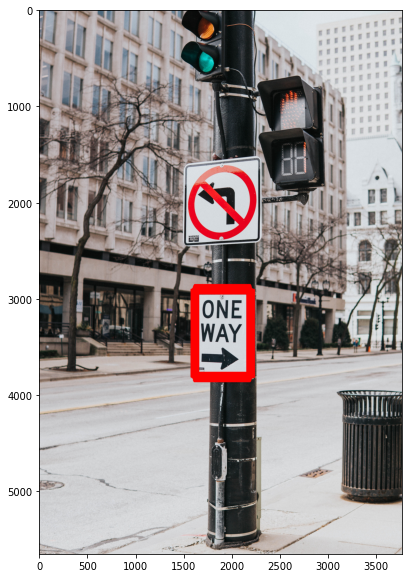

In [20]:
# Python program to illustrate
# template matching
import cv2
import numpy as np

# Read the main image
img_bgr = cv2.imread("bilder/traffic_scene.jpg")

# Convert it to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Read the template
template = cv2.imread("bilder/template_one_way.jpg", cv2.IMREAD_GRAYSCALE)

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
# 0.29693788
threshold = 0.29  # Attention! And here comes the magic number!

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Store width and height of template in w and h
h,w = template.shape

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,0,255), 5)

# Show the final image with the matched area.
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure( figsize=(10,10) )
plt.imshow(img_rgb)
plt.show()

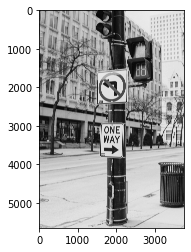

In [21]:
plt.imshow(img_gray, cmap="gray")
plt.show()

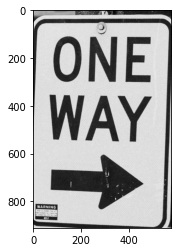

In [22]:
plt.imshow(template, cmap="gray")
plt.show()

In [2]:
loc

(array([422, 422, 423, 423, 423, 424, 424, 429, 429, 429, 430, 430, 430,
        430, 431, 431]),
 array([705, 706, 704, 705, 706, 705, 706, 659, 660, 661, 658, 659, 660,
        661, 659, 660]))

In [6]:
for pt in zip(*loc[::-1]):
    print(pt)

(705, 422)
(706, 422)
(704, 423)
(705, 423)
(706, 423)
(705, 424)
(706, 424)
(659, 429)
(660, 429)
(661, 429)
(658, 430)
(659, 430)
(660, 430)
(661, 430)
(659, 431)
(660, 431)


# Visualisieren der Template Matching Ergebnisse

In [23]:
type( res )

numpy.ndarray

In [24]:
res.shape

(4742, 3191)

In [25]:
res.min()

-0.25346318

In [26]:
res.max()

0.9997157

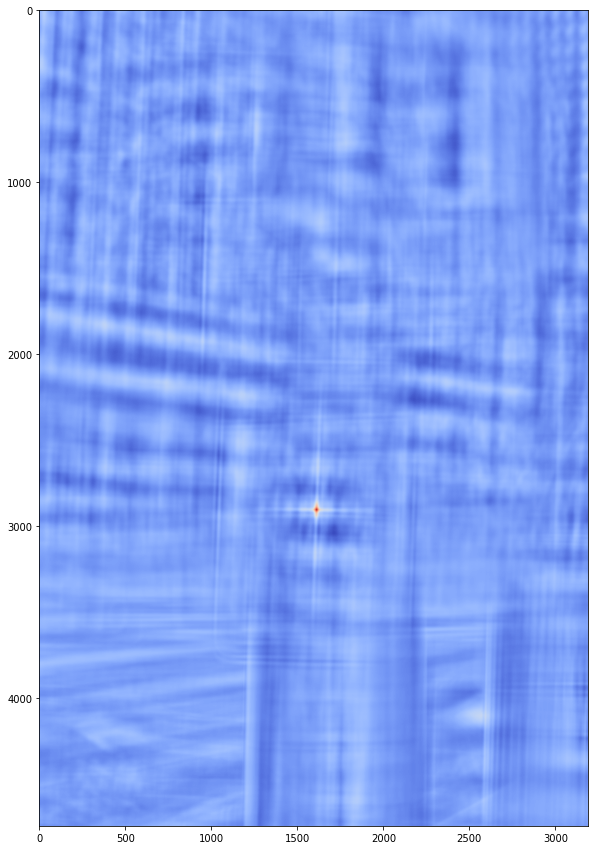

In [27]:
plt.figure( figsize=(15,15) )
plt.imshow(res, cmap="coolwarm")
plt.show()